In [6]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_ef_res_se import FCFEResSE
from notebooks.daudt.net_trainer import get_img_trio

In [2]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

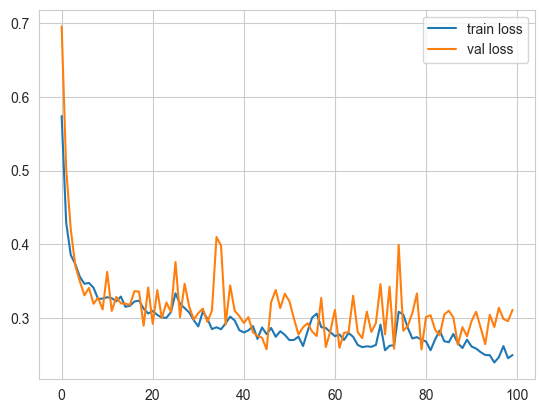

In [3]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [4]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.888009,0.095092,0.663467,0.824249,0.917816,0.964386,0.990448
change accuracy,33.0,0.658450,0.326861,0.000000,0.416842,0.746324,0.967552,1.000000
no change accuracy,33.0,0.882694,0.111544,0.625293,0.797310,0.912908,0.977485,0.998802
precision,33.0,0.267871,0.172576,0.000000,0.154106,0.265616,0.381523,0.636364
recall,33.0,0.632230,0.332207,0.000000,0.344377,0.693638,0.955747,1.000000
dice,32.0,0.347421,0.198531,0.014515,0.206340,0.345882,0.476343,0.759085
kappa,33.0,0.292946,0.193213,-0.021849,0.149987,0.291915,0.444677,0.700713


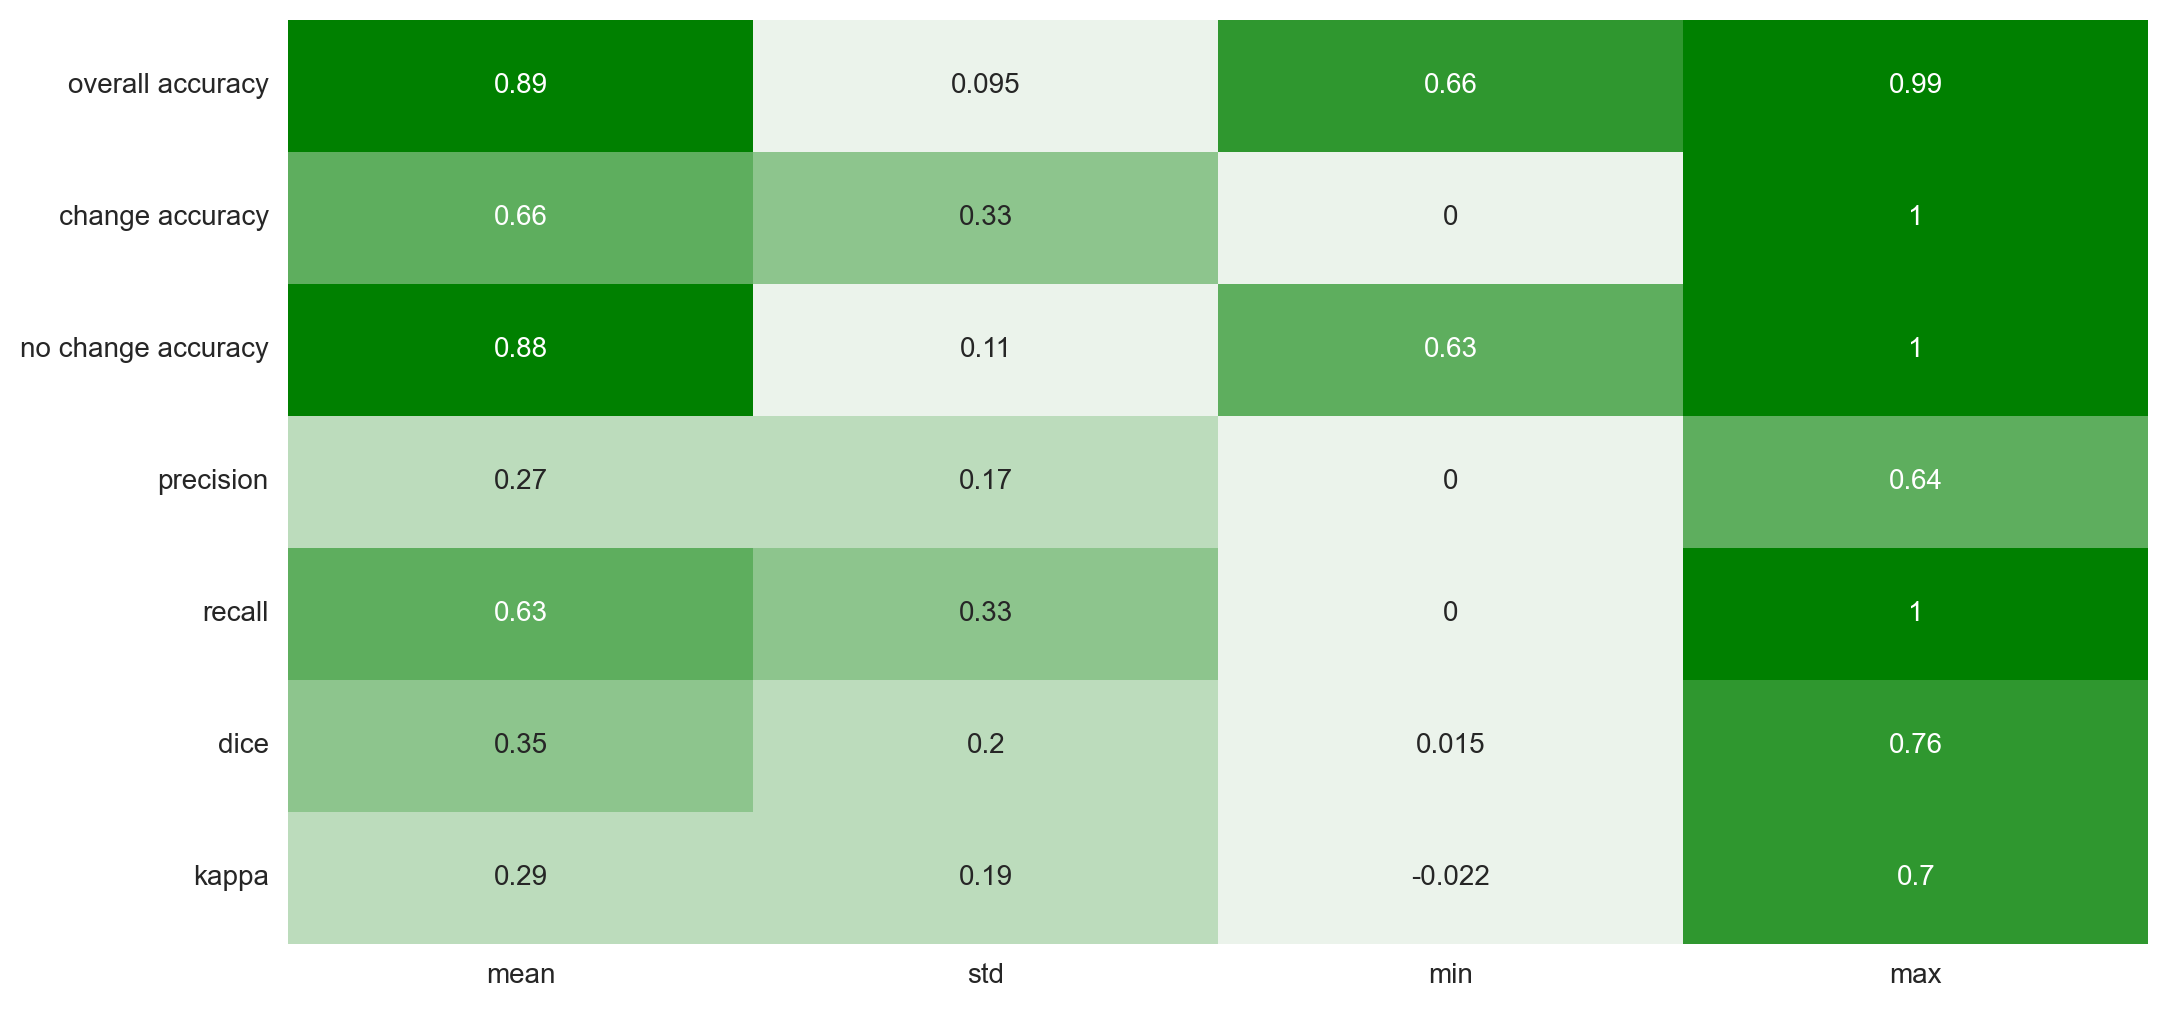

In [5]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [7]:
model = FCFEResSE(6, 2)
state = torch.load(f"./best_model.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

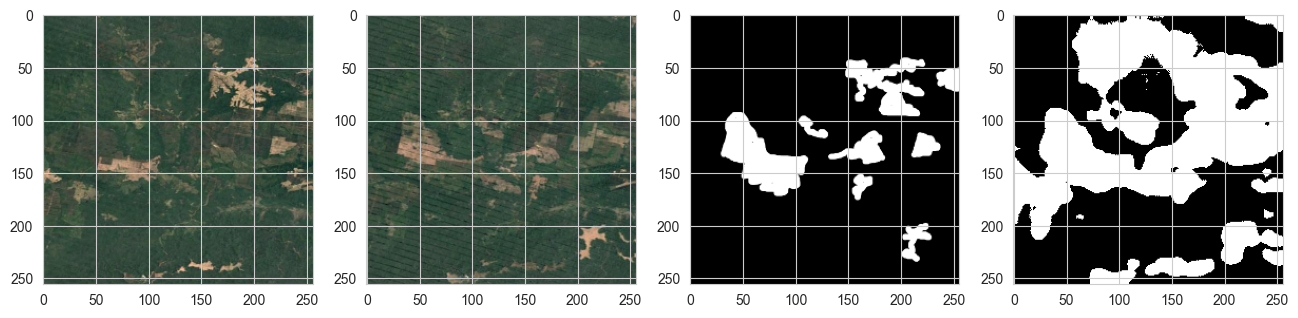

In [15]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    img = torch.cat((img1, img2))
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')